El objetivo de este trabajo es crear un modelo usando una red neuronal para predecir la velocidad final en metros por segundo de un cuerpo en caída libre, conociendo el tiempo total en segundos de duración de la caída.

Este es un problema de regresión, ya que se tiene como objetivo predecir un valor numérico Y en función de la variable X, y se utilizará aprendizaje supervisado, ya que se proporcionarán valores de entrada y de salida para el entrenamiento.

Cabe señalar que los valores que se utilizarán para el entrenamiento están calculados considerando el valor de la aceleración de gravedad como 9,8 m/s².

In [1]:
import numpy as np #Se importa la libreria matematica numpy
import tensorflow as tf #Se importa tensorflow para crear redes neuronales
import pandas as pd #Se importa pandas para cargar los datos en un dataframe
import openpyxl as op #Se importa Openpyxl para cargar archivos excel
import matplotlib.pyplot as plt #Se importa matplotlib.pyplot para hacer graficos

In [2]:
#Se cargan los datos del archivo excel con los valores de la velocidad final y los segundos de duracion de la caida
data = pd.read_excel(io="/content/ValoresCaidaLibre.xlsx",sheet_name="Hoja1",names=["Segundos","Velocidad"], usecols="A:B",engine="openpyxl")
#Se convierten los datos a un arreglo en numpy
segData = data["Segundos"].to_numpy()
velData = data["Velocidad"].to_numpy()

In [3]:
#Aqui se pueden ver de los valores de los segundos
segData

array([0.0000e+00, 4.0000e-01, 5.0000e-01, 6.0000e-01, 1.1000e+00,
       1.2000e+00, 1.5000e+00, 1.7000e+00, 1.7400e+00, 1.9000e+00,
       2.5000e+00, 2.8000e+00, 3.6000e+00, 4.0000e+00, 5.0000e+00,
       5.6000e+00, 6.7000e+00, 6.8000e+00, 6.9000e+00, 7.0000e+00,
       8.0000e+00, 9.9000e+00, 1.0600e+01, 1.1000e+01, 1.1100e+01,
       1.1200e+01, 1.1400e+01, 1.1500e+01, 1.1700e+01, 1.2600e+01,
       1.3400e+01, 1.4500e+01, 2.0000e+01, 2.1000e+01, 2.1300e+01,
       2.1900e+01, 2.2200e+01, 2.2400e+01, 2.2900e+01, 2.5500e+01,
       2.6000e+01, 2.6600e+01, 3.1000e+01, 3.1700e+01, 3.2500e+01,
       3.2800e+01, 3.3000e+01, 3.3900e+01, 3.4400e+01, 4.0000e+01,
       4.2700e+01, 4.3000e+01, 4.5000e+01, 5.0000e+01, 5.0210e+01,
       5.5000e+01, 5.5200e+01, 5.7200e+01, 6.5000e+01, 6.6000e+01,
       6.7900e+01, 7.7000e+01, 7.7700e+01, 7.7900e+01, 7.8200e+01,
       8.3300e+01, 8.8800e+01, 8.9200e+01, 9.0200e+01, 9.8000e+01,
       9.9700e+01, 1.0000e+02, 1.2100e+02, 1.7660e+02, 1.8900e

In [4]:
#Aqui se pueden ver los valores de la velocidades
velData

array([0.000000e+00, 3.920000e+00, 4.900000e+00, 5.880000e+00,
       1.078000e+01, 1.176000e+01, 1.470000e+01, 1.666000e+01,
       1.705200e+01, 1.862000e+01, 2.450000e+01, 2.744000e+01,
       3.528000e+01, 3.920000e+01, 4.900000e+01, 5.488000e+01,
       6.566000e+01, 6.664000e+01, 6.762000e+01, 6.860000e+01,
       7.840000e+01, 9.702000e+01, 1.038800e+02, 1.078000e+02,
       1.087800e+02, 1.097600e+02, 1.117200e+02, 1.127000e+02,
       1.146600e+02, 1.234800e+02, 1.313200e+02, 1.421000e+02,
       1.960000e+02, 2.058000e+02, 2.087400e+02, 2.146200e+02,
       2.175600e+02, 2.195200e+02, 2.244200e+02, 2.499000e+02,
       2.548000e+02, 2.606800e+02, 3.038000e+02, 3.106600e+02,
       3.185000e+02, 3.214400e+02, 3.234000e+02, 3.322200e+02,
       3.371200e+02, 3.920000e+02, 4.184600e+02, 4.214000e+02,
       4.410000e+02, 4.900000e+02, 4.920580e+02, 5.390000e+02,
       5.409600e+02, 5.605600e+02, 6.370000e+02, 6.468000e+02,
       6.654200e+02, 7.546000e+02, 7.614600e+02, 7.6342

A continuacion se procedera a crear el modelo para luego entrenarlo. la cantidad de capas, neuronas, epocas y tasa de entrenamiento que se utilizaran han sido determinados mediante prueba y error.

In [5]:
#Se crea la capa de entrada con 2 neuronas y datos de entrada de forma unidimensional
input = tf.keras.layers.Dense(units=2,input_shape=[1])
#Se crean tres capas ocultas con 16 neuronas en cada una y se utiliza la funcion de activacion relu
hidden1 = tf.keras.layers.Dense(units=16,activation="relu")
hidden2 = tf.keras.layers.Dense(units=16,activation="relu")
hidden3 = tf.keras.layers.Dense(units=16,activation="relu")
#Se crea la capa de salida con 1 neurona
output = tf.keras.layers.Dense(units=1)
#Se crea el modelo y se pasa la capa de entrada, las capas ocultas y la de salida
model = tf.keras.Sequential([input,hidden1,hidden2, hidden3, output])
#Se entrega un resumen de como a quedado la estructura
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 16)                48        
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 613 (2.39 KB)
Trainable params: 613 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
#Se compila el modelo utilizando el optimizador Adam el cual combina los optimizadores Momentum y Rmsprop utlizando una tasa de aprendizaje de 0.01
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="mean_squared_error",
    metrics=["accuracy"]
)

In [7]:
#Se entrena al modelo 800 veces con los valores de los segundos y velocidad para encontrar una funcion matematica que logre representar un patron entre las dos variables
#Los segundos corresponden a la variable X y la velocidad a la variable Y
history = model.fit(segData, velData, epochs=800,verbose=True)

Epoch 1/800
7/7 [==============================] - 3s 14ms/step - loss: 1304566016.0000 - accuracy: 0.0050
Epoch 2/800
7/7 [==============================] - 0s 6ms/step - loss: 1092424064.0000 - accuracy: 0.0000e+00
Epoch 3/800
7/7 [==============================] - 0s 6ms/step - loss: 687196800.0000 - accuracy: 0.0000e+00
Epoch 4/800
7/7 [==============================] - 0s 13ms/step - loss: 113785768.0000 - accuracy: 0.0000e+00
Epoch 5/800
7/7 [==============================] - 0s 15ms/step - loss: 104481632.0000 - accuracy: 0.0000e+00
Epoch 6/800
7/7 [==============================] - 0s 8ms/step - loss: 12789626.0000 - accuracy: 0.0000e+00
Epoch 7/800
7/7 [==============================] - 0s 7ms/step - loss: 42049224.0000 - accuracy: 0.0000e+00
Epoch 8/800
7/7 [==============================] - 0s 5ms/step - loss: 12252702.0000 - accuracy: 0.0000e+00
Epoch 9/800
7/7 [==============================] - 0s 6ms/step - loss: 5814194.0000 - accuracy: 0.0000e+00
Epoch 10/800
7/7 [=====

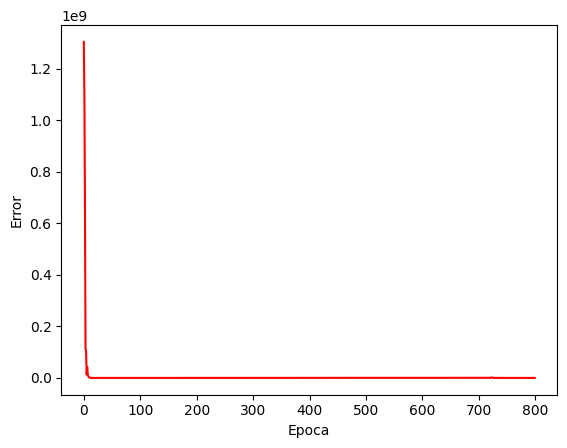

In [8]:
#Se grafica la evolucion del error a medida que se ejecutan las iteraciones del entrenamiento
plt.xlabel("Epoca")
plt.ylabel("Error")
plt.plot(history.history["loss"],linestyle="-",color="r")
plt.show()

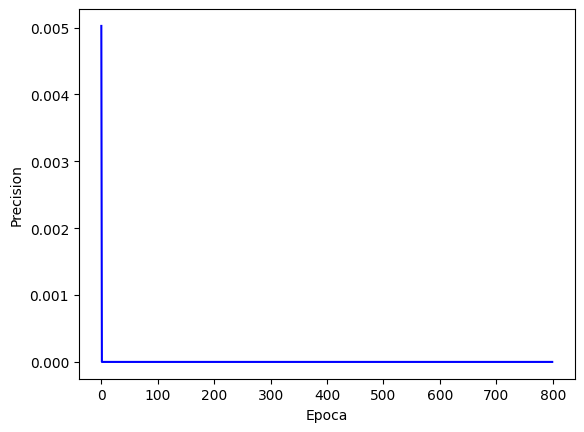

In [9]:
#Se grafica la evolucion de la precision a medida que se ejecutan las iteraciones del entrenamiento
plt.xlabel("Epoca")
plt.ylabel("Precision")
plt.plot(history.history["accuracy"],linestyle="-",color="b")
plt.show()

In [10]:
#Se hace una prediccion utilizando el valor 7.8
#Si el modelo esta correcto el valor de la prediccion deberia aproximarse a 76.44 m/s
print("Hacer una predeccion")
velocity = model.predict([7.8])
print(velocity,'metros/segundos')

Hacer una predeccion
1/1 [==============================] - 0s 220ms/step
[[77.20439]] metros/segundos


In [11]:
#Se hace una prediccion utilizando el valor 100.5
#Si el modelo esta correcto el valor de la prediccion deberia aproximarse a 984,9 m/s
print("Hacer una predeccion")
velocity = model.predict([100.5])
print(velocity,'metros/segundos')

Hacer una predeccion
1/1 [==============================] - 0s 97ms/step
[[985.26495]] metros/segundos


In [12]:
#Se hace una prediccion utilizando el valor 452.5
#Si el modelo esta correcto el valor de la prediccion deberia aproximarse a 4434.5 m/s
print("Hacer una predeccion")
velocity = model.predict([452.5])
print(velocity,'metros/segundos')

Hacer una predeccion
1/1 [==============================] - 0s 91ms/step
[[4433.3486]] metros/segundos


In [14]:
#Se hace una prediccion utilizando el valor 0.3
#Si el modelo esta correcto el valor de la prediccion deberia aproximarse a 2.94 m/s
print("Hacer una predeccion")
velocity = model.predict([0.3])
print(velocity,'metros/segundos')

Hacer una predeccion
1/1 [==============================] - 0s 47ms/step
[[3.7052813]] metros/segundos
